# Introduction

In [2]:
# importing libraries
import os
import sys

sys.path.append("../")
from utils.predictor import EnhancedGhanaRainfallPredictor

In [3]:
# 1. Instantiate the class
predictor_class = EnhancedGhanaRainfallPredictor()

Dataset loaded Successfully
Shape: (10928, 12)

Columns: ['ID', 'user_id', 'confidence', 'predicted_intensity', 'community', 'district', 'prediction_time', 'indicator', 'indicator_description', 'time_observed', 'Target', 'forecast_length']
            ID  user_id  confidence  predicted_intensity community  \
0  ID_KwcTp_12       11         0.3                  0.0    Tumfa    
1  ID_K9vWT_12       17         0.3                  0.0  Kwabeng    
2  ID_AIQg3_12       19         0.3                  0.0  Akropong   
3  ID_px4yf_12       23         0.3                  0.0   Asamama   
4  ID_QYYmK_12       23         0.3                  0.0   Asamama   

     district      prediction_time indicator indicator_description  \
0  atiwa_west  2025-05-30 11:09:33       NaN                   NaN   
1  atiwa_west  2025-05-30 11:09:35       NaN                   NaN   
2  atiwa_west  2025-05-30 11:09:47       NaN                   NaN   
3  atiwa_west  2025-05-30 11:16:33       NaN               

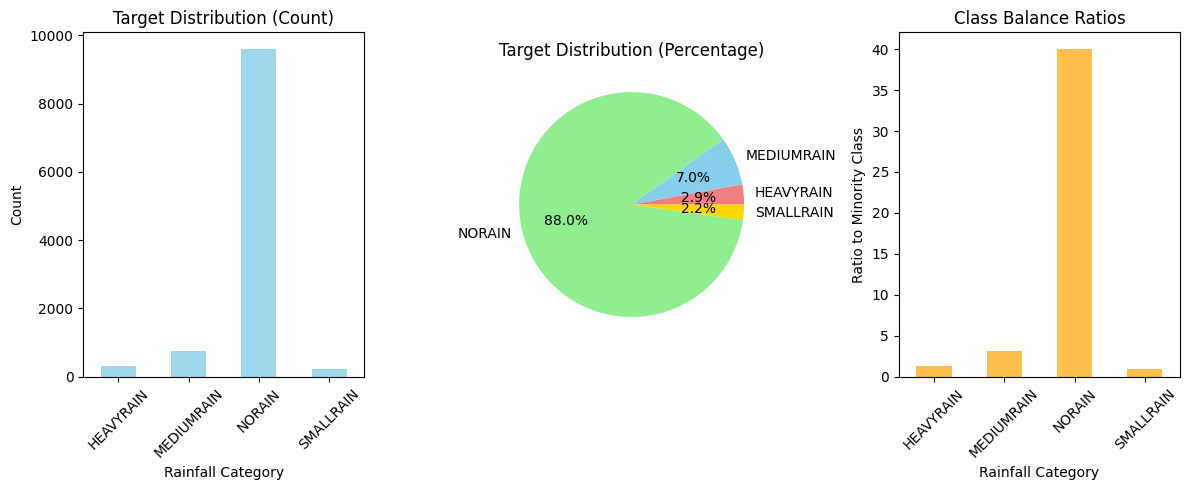

In [5]:
# 2. Loading data and Explore the dataset
df = predictor_class.load_and_explore_data('../data/train.csv')

In [6]:
# 3. Preprocess the data
processed_df = predictor_class.preprocess_data(df)

=== Enhanced Preprocessing Ghana Rainfall Data ===
Dropping indicator: 95.4% missing values
Dropping indicator_description: 96.8% missing values
Dropping time_observed: 99.3% missing values
Categorical features (4): ['community', 'district', 'day_of_week', 'month']
Numerical features (29): ['predicted_intensity', 'confidence', 'forecast_length', 'hour', 'day_of_year', 'is_weekend', 'is_rainy_season', 'is_dry_season', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'confidence_intensity_interaction', 'forecast_confidence_ratio', 'farmer_confidence_mean', 'farmer_confidence_std', 'farmer_confidence_count', 'farmer_predicted_intensity_mean', 'farmer_predicted_intensity_std', 'community_confidence_mean', 'community_confidence_std', 'community_confidence_count', 'community_predicted_intensity_mean', 'community_predicted_intensity_std', 'district_confidence_mean', 'district_confidence_std', 'district_confidence_count', 'district_predicted_intensity_mean', 'district_predicted_intensity_std'

In [7]:
# Preparing feature and target
X, y = predictor_class.prepare_features_and_target(processed_df, target_column= 'Target')

Using 33 features for modeling

Target classes: ['HEAVYRAIN' 'MEDIUMRAIN' 'NORAIN' 'SMALLRAIN']
Target distribution:
  HEAVYRAIN: 315 (2.9%)
  MEDIUMRAIN: 761 (7.0%)
  NORAIN: 9612 (88.0%)
  SMALLRAIN: 240 (2.2%)


In [8]:
processed_df.head()

,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,Target,forecast_length,hour,...,community_confidence_count,community_predicted_intensity_mean,community_predicted_intensity_std,district_confidence_mean,district_confidence_std,district_confidence_count,district_predicted_intensity_mean,district_predicted_intensity_std,confidence_intensity_interaction,forecast_confidence_ratio
0,ID_KwcTp_12,11,0.3,0.0,Tumfa,atiwa_west,2025-05-30 11:09:33,MEDIUMRAIN,12,11,...,55,0.132182,0.251475,0.481259,0.2123,4877,0.045034,0.168316,0.0,0.023077
1,ID_K9vWT_12,17,0.3,0.0,Kwabeng,atiwa_west,2025-05-30 11:09:35,HEAVYRAIN,12,11,...,521,0.071651,0.201132,0.481259,0.2123,4877,0.045034,0.168316,0.0,0.023077
2,ID_AIQg3_12,19,0.3,0.0,Akropong,atiwa_west,2025-05-30 11:09:47,MEDIUMRAIN,12,11,...,409,0.079193,0.218799,0.481259,0.2123,4877,0.045034,0.168316,0.0,0.023077
3,ID_px4yf_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:33,HEAVYRAIN,12,11,...,1139,0.006980,0.069198,0.481259,0.2123,4877,0.045034,0.168316,0.0,0.023077
4,ID_QYYmK_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:55,HEAVYRAIN,12,11,...,1139,0.006980,0.069198,0.481259,0.2123,4877,0.045034,0.168316,0.0,0.023077


🚀 Starting enhanced model training...
🔍 Optimizing sampling strategy...


  none: 0.9622 (±0.0158)
  smote: 0.9985 (±0.0004)
  adasyn: 0.9987 (±0.0005)
  smote_enn: 0.9992 (±0.0005)
  undersample: 0.9375 (±0.0255)

✅ Best sampling strategy: smote_enn (F1-macro: 0.9992)
Applied optimal sampling strategy

📊 MODEL PERFORMANCE RESULTS
Accuracy: 0.9835
Macro-F1: 0.9248 ⭐
Weighted-F1: 0.9839
Macro-Precision: 0.8974
Macro-Recall: 0.9558

Per-Class F1 Scores:
  HEAVYRAIN: 0.9403
  MEDIUMRAIN: 0.9511
  NORAIN: 0.9922
  SMALLRAIN: 0.8155

Cross-Validation Results:
  Macro-F1: 0.9988 (±0.0006)
  Accuracy: 0.9988 (±0.0006)

Detailed Classification Report:
              precision    recall  f1-score   support

   HEAVYRAIN       0.89      1.00      0.94        63
  MEDIUMRAIN       0.94      0.96      0.95       152
      NORAIN       1.00      0.99      0.99      1923
   SMALLRAIN       0.76      0.88      0.82        48

    accuracy                           0.98      2186
   macro avg       0.90      0.96      0.92      2186
weighted avg       0.98      0.98      0.9

<Figure size 1000x800 with 0 Axes>

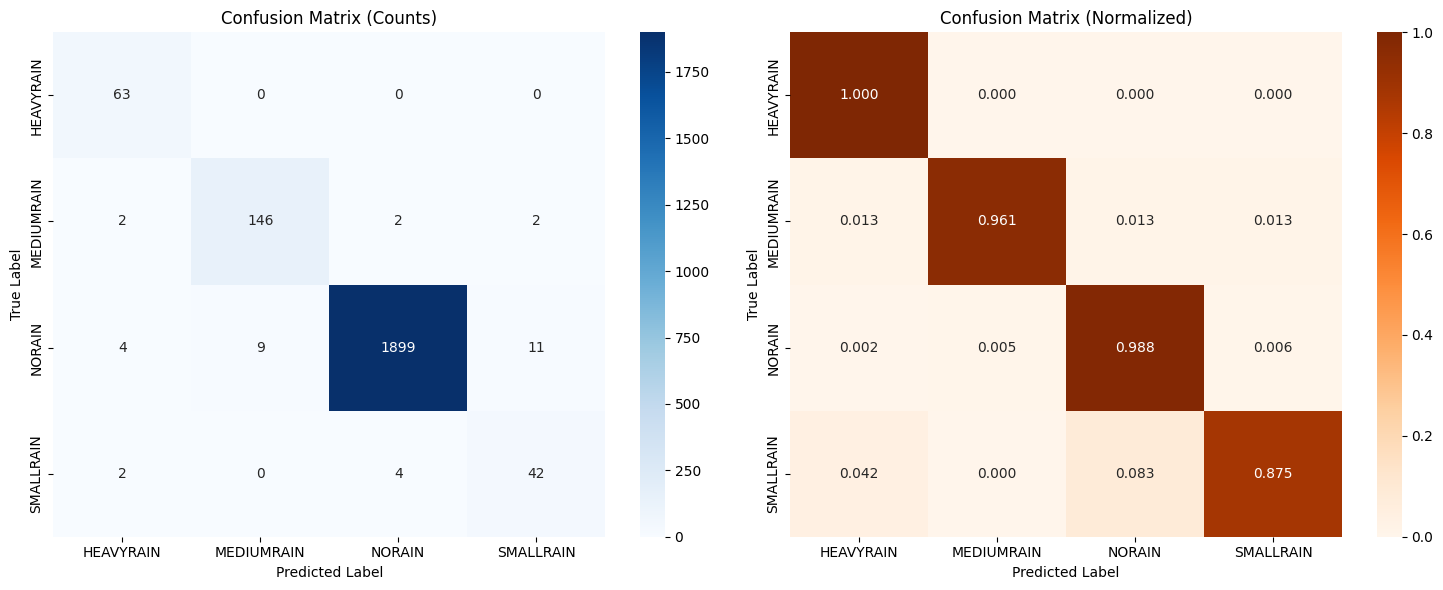

In [11]:
# Train Model (without SMOTE)
model, preproc = predictor_class.train_model(
    X, y,
    optimize_hyperparams=False,   # try True later for a boost (takes longer)
    use_best_sampling=True        # tries SMOTE/ADASYN/SMOTEENN/undersampling and picks best by macro-F1
)


Top 20 Most Important Features for Rainfall Prediction:
 1. num__day_of_year                         0.0994
 2. num__forecast_confidence_ratio           0.0588
 3. num__community_confidence_mean           0.0511
 4. num__hour                                0.0491
 5. num__farmer_confidence_count             0.0489
 6. num__hour_sin                            0.0487
 7. num__farmer_confidence_mean              0.0480
 8. cat__community_Asamama                   0.0403
 9. num__farmer_predicted_intensity_mean     0.0377
10. num__community_confidence_count          0.0376
11. num__farmer_predicted_intensity_std      0.0366
12. num__farmer_confidence_std               0.0315
13. num__forecast_length                     0.0303
14. cat__day_of_week_4                       0.0279
15. num__community_predicted_intensity_mean  0.0261
16. num__confidence                          0.0256
17. num__community_confidence_std            0.0234
18. num__community_predicted_intensity_std   0.0206
19. cat

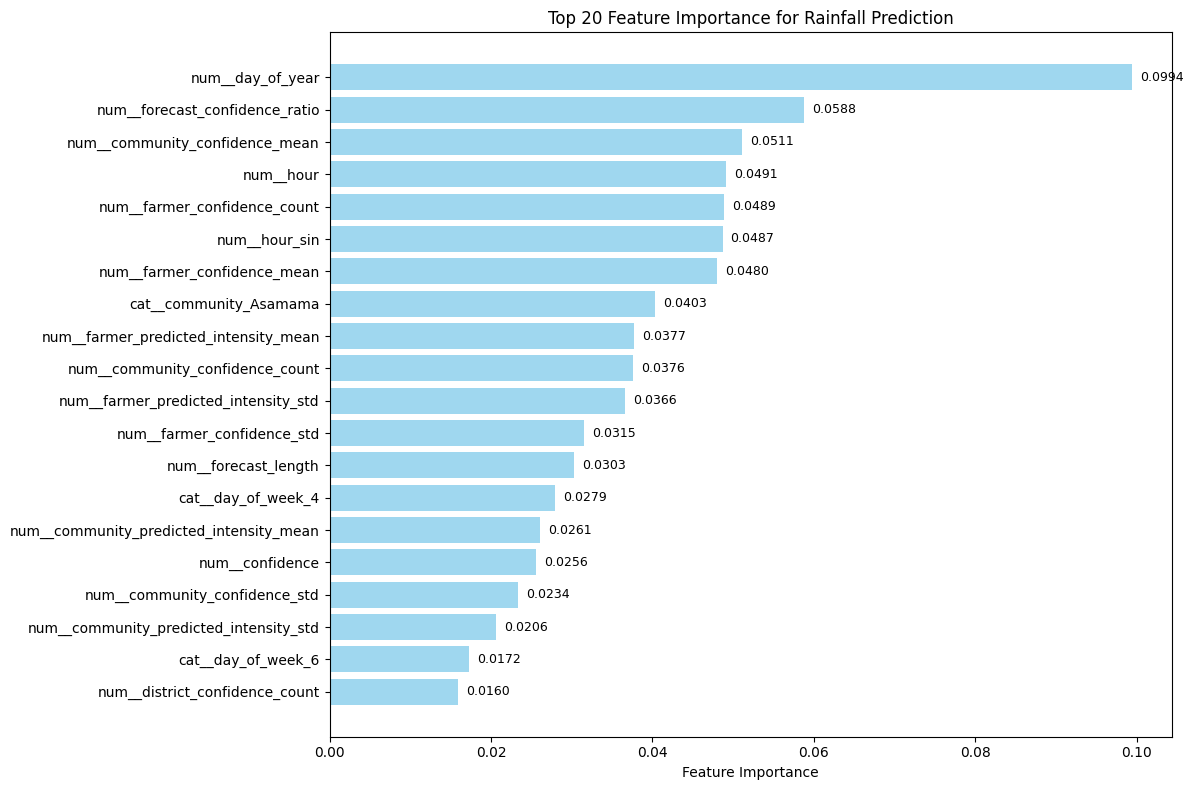

In [12]:
_ = predictor_class.analyze_feature_importance(top_n=20)

In [16]:
import pandas as pd
test_df = pd.read_csv("../data/test.csv")
test_df_proc = predictor_class.preprocess_data(test_df)


=== Enhanced Preprocessing Ghana Rainfall Data ===
Dropping indicator: 92.5% missing values
Dropping indicator_description: 92.5% missing values
Dropping time_observed: 92.5% missing values
Categorical features (4): ['community', 'district', 'day_of_week', 'month']
Numerical features (29): ['predicted_intensity', 'confidence', 'forecast_length', 'hour', 'day_of_year', 'is_weekend', 'is_rainy_season', 'is_dry_season', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'confidence_intensity_interaction', 'forecast_confidence_ratio', 'farmer_confidence_mean', 'farmer_confidence_std', 'farmer_confidence_count', 'farmer_predicted_intensity_mean', 'farmer_predicted_intensity_std', 'community_confidence_mean', 'community_confidence_std', 'community_confidence_count', 'community_predicted_intensity_mean', 'community_predicted_intensity_std', 'district_confidence_mean', 'district_confidence_std', 'district_confidence_count', 'district_predicted_intensity_mean', 'district_predicted_intensity_std'

In [17]:
exclude = ["ID", "prediction_time", "user_id", "Target"]
X_test = test_df_proc[[c for c in test_df_proc.columns if c not in exclude]]

In [18]:
X_test_tr = predictor_class.preprocessor.transform(X_test)   # now works (preprocessor is fitted)
test_pred  = predictor_class.final_model.predict(X_test_tr)
test_prob  = predictor_class.final_model.predict_proba(X_test_tr)

In [19]:
# convert back to labels
labels = predictor_class.label_encoder.inverse_transform(test_pred)

In [21]:
# 
import numpy as np

results = pd.DataFrame({
    "ID": test_df.get("ID", range(len(test_df))),
    "predicted_rainfall": labels,
    "confidence": np.max(test_prob, axis = 1)
})

for i, cls in enumerate(predictor_class.label_encoder.classes_):
    results[f"prob_{cls}"] = test_prob[:, i]

results.head()

,ID,predicted_rainfall,confidence,prob_HEAVYRAIN,prob_MEDIUMRAIN,prob_NORAIN,prob_SMALLRAIN
0,ID_SbTdy_24,NORAIN,0.952921,0.011899,0.021846,0.952921,0.013334
1,ID_SBKYz_24,NORAIN,0.952921,0.011899,0.021846,0.952921,0.013334
2,ID_fAimg_24,NORAIN,0.952921,0.011899,0.021846,0.952921,0.013334
3,ID_2wBqC_24,NORAIN,0.952921,0.011899,0.021846,0.952921,0.013334
4,ID_NItox_24,NORAIN,0.952921,0.011899,0.021846,0.952921,0.013334


In [22]:
# Only run this if you want a submission file locally
sample_path = '../data/SampleSubmission.csv'     # <-- make sure the path is correct
sub = pd.read_csv(sample_path).copy()

In [23]:
# Assumes first col is ID and second col is the label column
sub.iloc[:, 1] = labels
sub.to_csv("submission.csv", index=False)
print("Saved: submission.csv")
sub.head()

Saved: submission.csv


,ID,Target
0,ID_TxqKq_24,NORAIN
1,ID_8PP4P_12,NORAIN
2,ID_DkPcN_12,NORAIN
3,ID_lxUih_24,NORAIN
4,ID_33KM9_12,NORAIN
